# CSPB 3202 Final Project #

Tyler Kinkade, jaki9292@colorado.edu

GitHub: [https://github.com/jaki9292/rl-project](https://github.com/jaki9292/rl-project)

## Overview ##

This write-up reports on a small project to compare the effectiveness of reinforcement learning algorithms (Russell & Norvig, 2022; Sutton & Barto, 2018) within the Gymnasium (2022) "lunar lander" environment.

The report is divided into the following sections: approach, results, discussion, and suggestions.

## Approach ##

This section is divided into the following subsections: environment, models, methods.

### Environment ###

The lunar lander environment (pictured below) simulates rocket trajectory physics with the primary aim of landing a lunar lander on a central landing pad (marked by two flags) by means of turning its three rockets (left, right, and main) on or off. The agent operating the lander is rewarded for landing slowly, in an upright position, on both legs, on or near the landing pad and penalized otherwise. Fuel is unlimited, but a penalty is made for each time an engine fires. Scores of 200 points or more are considered a solution. 

The observation space is described by an 8-vector comprised of the lander coordinates $(x,y)$, its linear velocities in the $x$ and $y$ directions, its angle, its angular velocity, and a boolean each for whether the left and right leg are in contact with the ground. The environment has both discrete and continuous versions, but only the discrete version is used here to facilitate the comparison of simple models. The environment gravity, wind power, and turbulence can also be specified. The starting state is the top center with a random force to it. The termination state occurs when the lander stops moving or moves outside the frame. The action space is comprised of 4 discrete actions: do nothing, fire left thruster, fire main thruster, or fire right thruster.

In [1]:
# Display Lunar Lander GIF
from IPython.display import Image
Image(url= "https://gymnasium.farama.org/_images/lunar_lander.gif")

In [2]:
# Print environment parameters
# References: 
# https://gymnasium.farama.org/api/env/
# https://gymnasium.farama.org/environments/box2d/lunar_lander/

# Install dependencies
# pip install gymnasium
# pip install gymnasium[box2d]

import gymnasium as gym

# Initialize environment
env = gym.make("LunarLander-v2", 
               continuous = False,      # Discrete version
               gravity = -10.0, 
               enable_wind = False, 
               wind_power = 0.0, 
               turbulence_power = 0.0, 
               render_mode="rgb_array") # Render for machine

env.reset()

print("Environment metadata:\n", env.metadata)
print("\nObservation space:\n", env.observation_space)
print("\nAction space:\n", env.action_space)

Environment metadata:
 {'render_modes': ['human', 'rgb_array'], 'render_fps': 50}

Observation space:
 Box([-90.        -90.         -5.         -5.         -3.1415927  -5.
  -0.         -0.       ], [90.        90.         5.         5.         3.1415927  5.
  1.         1.       ], (8,), float32)

Action space:
 Discrete(4)


### Models ###

Four models are compared in this project: a random agent, a simple reflex agent, a Q-learning agent, and an approximate reinforcement learning agent(Russell & Norvig, 2022; Sutton & Barto, 2018). 

A random agent selects any of the possible actions uniformly randomly at each step without regard to the environment. The animation above is an example of such an agent, which is obviously a poor strategy. 

A simple reflex agent can only react to some input but does not retain any memory of the past and, as a result, cannot learn. 

A Q-learning agent alternates between learning through exploration and exploiting what it has learned by choosing the optimal policy for each state. Although this is obviously better than the relatively ignorant reflex agent, Q-learning agents can quickly use up available computational capacity in large and complex environments. 

An approximate reinforcement learning agent is meant to address this issue by approximating a Q-learning agent through the use of a weighted linear approximation of the Q-values which it learns through exploration a certain amount of the time. Theoretically, this should simplify the computational demands.

It is expected that the last two models will perform better than the first two; however, it is possible that some difficulties might arise with the two learning agents. The environment might be too complex for the Q-learning agent to learn within a reasonable time. It is also possible that approximating the optimal choices may be insufficient. 

### Methods ###

Each model will be run for 10,000 time-steps (approximately 100 episodes) and their scores over each of the episodes will be plotted and compared. Visualizing each models' performance over successive episodes permits comparison of how each agent progressed in learning how to solve the model. This is preferable to single metrics, such as maximum or average scores which can conceal important distinctions. For example, we can discover whether an agent achieved a maximum only once, but performed poorly most of the time. Similarly, an average score can conceal unstable, fluctuating performance. Ideally, we would like to see an agent learning quickly and then stably maintaining scores over the solution threshold of 200 points.

Through this methodology, we will be able to explore the advantages and disadvantages of various models and demonstrate how a solution to the problem can be explored through the modfication of features and comparison of models.

## Results ## 

show the result and interpretation of your experiment. Any iterative improvements summary. demo clips
Does it include the results summary, interpretation of experiments and visualization (e.g. performance comparison table, graphs etc)?

In this section, I compare the four different models: a random agent, a simple reflex agent, a Q-learning agent, and an approximate reinforcement learning agent.

### Random Agent ###

As previously mentioned, the random agent selects any of the four actions randomly at each step.

In [3]:
# Run and record random agent in lunar lander environment
# References: 
# https://gymnasium.farama.org/
# https://gymnasium.farama.org/api/utils/#save-rendering-videos
# https://gymnasium.farama.org/environments/box2d/lunar_lander/
# https://github.com/openai/gym/blob/master/gym/envs/box2d/lunar_lander.py

# Install dependencies
# pip install gymnasium
# pip install gymnasium[box2d]
# pip install moviepy

import gymnasium as gym
from gymnasium.utils.save_video import save_video
import numpy as np
from IPython.utils.capture import capture_output

# Initialize environment
env = gym.make("LunarLander-v2", 
               continuous = False,          # Discrete version
               gravity = -10.0, 
               enable_wind = False, 
               wind_power = 0.0, 
               turbulence_power = 0.0, 
               render_mode="rgb_array_list") # Render for machine

# Reset environment with random number generator seed for reproducibility
observation, info = env.reset(seed = 21)

# Accumulator variables
score = 0.0
scores = []
episode = 0
step_start_index = 0

# Attempt for 10,000 timesteps
for step_index in range(10000):

    # Get random action from action space
    action = env.action_space.sample()

    # Obtain observation, reward, terminated status, truncated status, 
    # and environment info for given action
    observation, reward, terminated, truncated, info = env.step(action)

    # Accumulate reward total 
    score += reward

    # If episode ends
    if terminated or truncated:
        # Append total to list of reward totals
        scores.append(score)

        # Report result
        print(f"Episode {episode} score: {score}")

        # Suppress MoviePy stdout
        # https://stackoverflow.com/a/35624406/14371011
        with capture_output() as captured:
            # Save mp4 video of every (k^3)th (i.e., 0, 1, 8, 27, ...)
            save_video(env.render(),
                    video_folder = "videos",
                    name_prefix = "random_agent",
                    fps = env.metadata["render_fps"],
                    step_starting_index = step_start_index,
                    episode_index = episode)

        # Increment episode
        episode += 1

        # Set starting step index for videos to next step
        step_start_index = step_index + 1

        # Reset reward total
        score = 0
        
        # Start new episode 
        observation, info = env.reset()

env.close()

ra_scores = np.array(scores)

print(f"\nAverage score: {np.average(ra_scores)}; Max score: {np.max(ra_scores)}")

Episode 0 score: -201.8646708674159
Episode 1 score: -23.252090445647724
Episode 2 score: -85.31438108543946
Episode 3 score: -160.54766679184232
Episode 4 score: -172.0196192235644
Episode 5 score: -243.2786599604595
Episode 6 score: -55.92887062270887
Episode 7 score: -247.93858464784873
Episode 8 score: -594.8170201011028
Episode 9 score: -138.0989838057126
Episode 10 score: -145.0432695657327
Episode 11 score: -103.23526914632467
Episode 12 score: -162.69897180900898
Episode 13 score: -124.88053808009148
Episode 14 score: -345.71491177559994
Episode 15 score: -278.1370027669517
Episode 16 score: -135.09829309368672
Episode 17 score: -204.17966670647812
Episode 18 score: -321.1186627712949
Episode 19 score: -506.53800348149775
Episode 20 score: -323.6309670410643
Episode 21 score: -325.3596726433608
Episode 22 score: -193.59172556801568
Episode 23 score: -275.6343699655332
Episode 24 score: -195.61296955035925
Episode 25 score: -95.62798265873926
Episode 26 score: -178.8229391399433

[Link to video of 64<sup>th</sup> episode](videos/random_agent-episode-64.mp4)

In [4]:
# First 41 cubes from https://oeis.org/A000578
cubes = [0, 1, 8, 27, 64, 125, 216, 343, 512, 729, 1000, 1331, 1728, 2197, 2744, 3375, 4096, 4913, 5832, 6859, 8000, 9261, 10648, 12167, 13824, 15625, 17576, 19683, 21952, 24389, 27000, 29791, 32768, 35937, 39304, 42875, 46656, 50653, 54872, 59319, 64000]
len(cubes)

41

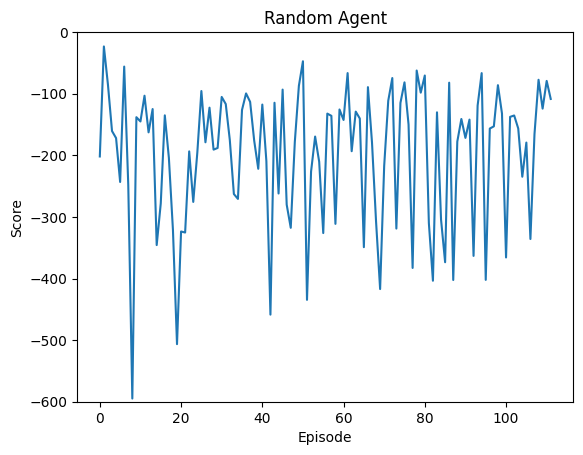

In [7]:
import matplotlib.pyplot as plt

plt.plot(ra_scores)
plt.ylim([-600,0])
plt.title("Random Agent")
plt.xlabel("Episode")
plt.ylabel("Score");

As the above graph shows, the random agent does not learn anything and never achieves a positive score on any attempt, as expected.

### Simple Reflex Agent ###

Next, we examine an agent who can fire its left and right thrusters in reaction to its horizontal distance from the landing pad.

In [6]:
# Simple reflex agent

### Q-Learning Agent ###

### Approximate Reinforcement Leaning Agent ###

## Discussion ## 

Does it include discussion (what went well or not and why), and suggestions for improvements or future work?

## Suggestions for Future Research ##




## References ##

Gymnasium. (2022). _Gymnasium documentation._ Farama Foundation. [https://gymnasium.farama.org/](https://gymnasium.farama.org/)

Russell, S., & Norvig, R. (2022). Artificial intelligence: A modern approach, (4th ed.). Pearson. 

Sutton, R. S., & Barto, A. G. (2018). Reinforcement learning: An introduction. MIT Press.